In [1]:
from DataPreprocessing.python.Data import *

import pandas as pd
import numpy as np


## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# This is new, it will allow us to interact with
# 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D


## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [18]:
rootData = Data("/Users/czkaiweb/Research/ErdosBootCamp/Project/ProjectData/Root_Insurance_data.csv")
rootData.loadData()
rootData.factorizeData()
rootData.splitData(fraction=[0.5,0.3,0.2],random_seed=42)
data_train = rootData.getTrainDataCopy()
data_validation = rootData.getValidationDataCopy()
data_test  = rootData.getTestDataCopy()

In [19]:
print(data_train.head())
print(data_validation.head())
print(data_test.head())

      Currently Insured  Number of Vehicles  Number of Drivers  \
6252                  0                   1                  1   
4684                  0                   3                  2   
1731                  1                   2                  2   
4742                  1                   3                  1   
4521                  1                   3                  1   

      Marital Status   bid  rank  click  policies_sold  
6252               1  10.0     1   True              1  
4684               0  10.0     3  False              0  
1731               0  10.0     4  False              0  
4742               1  10.0     4  False              0  
4521               0  10.0     4  False              0  
      Currently Insured  Number of Vehicles  Number of Drivers  \
3115                  0                   1                  2   
5295                  0                   1                  1   
5439                  1                   2                  1 

In [20]:
X_train = data_train.iloc[:, 0:4].values
y_train = data_train.iloc[:, -1].values

X_validation = data_validation.iloc[:, 0:4].values
y_validation = data_validation.iloc[:, -1].values

X_test = data_test.iloc[:, 0:4].values
y_test = data_test.iloc[:, -1].values

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
X_test = sc.transform(X_test)

In [22]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=42)
regressor.fit(X_train, y_train)
y_vpred = regressor.predict(X_validation)

In [23]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_validation, y_vpred))
print('Mean Squared Error:', metrics.mean_squared_error(y_validation, y_vpred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validation, y_vpred)))

Mean Absolute Error: 0.12901597473459112
Mean Squared Error: 0.06591558714485009
Root Mean Squared Error: 0.2567403107126929


In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [28]:
fpr, tpr, thresholds = roc_curve(y_validation, y_vpred, pos_label=1)

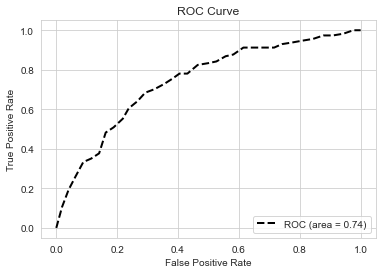

In [51]:
roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
def getReward(regressor, threshold, Xs, ys):
    reward = 0
    for index,X in enumerate(Xs):
        if regressor.predict(X.reshape(1,-1)) > threshold and ys[index] == 1 :
            reward += 130
        elif regressor.predict(X.reshape(1,-1)) > threshold and ys[index] == 0 :
            reward += -10
    return reward
            

In [36]:
reward_buffer = []
for threshold in thresholds:
    reward = getReward(regressor,threshold,X_validation,y_validation)
    reward_buffer.append(reward)
    
reward_buffer

[0,
 0,
 1300,
 2300,
 3010,
 3710,
 3610,
 3640,
 4900,
 4930,
 5160,
 5670,
 5800,
 6090,
 5930,
 5880,
 5900,
 5960,
 5600,
 5780,
 5440,
 5190,
 5160,
 4940,
 5000,
 4620,
 4140,
 3600,
 3500,
 3140,
 2830,
 2480,
 2260,
 1830,
 1490,
 1290]

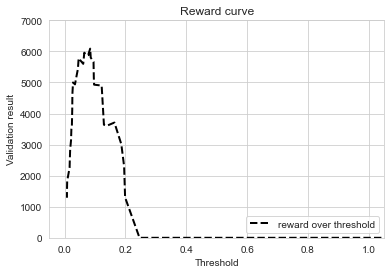

In [39]:
plt.plot(thresholds, reward_buffer, 'k--', label='reward over threshold', lw=2)
 
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 7000])
plt.xlabel('Threshold')
plt.ylabel('Validation result')
plt.title('Reward curve')
plt.legend(loc="lower right")
plt.show()

In [47]:
i_best_threshold = reward_buffer.index(max(reward_buffer))
best_threshold  = thresholds[i_best_threshold]
print("best_threshold = {}".format(best_threshold))

best_threshold = 0.08431340792640915


In [50]:
reward = getReward(regressor,best_threshold,X_test,y_test)
print("reward = {}".format(reward))
reward_naive = getReward(regressor,0,X_test,y_test)
print("naive reward = {}".format(reward_naive))

reward = 15050
naive reward = 5320
